In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [2]:
lt=pd.read_csv("LT_Finance - Linear regression .csv")

In [3]:
lt.shape

(744, 13)

In [4]:
lt.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,4-February-2020,111.5,114.55,111.45,114.15,113.444247,507614,3232,57585888.0,153199.0,30.18,3.10,2.65
1,3-February-2020,109.8,113.45,108.25,111.05,110.885149,582592,5341,64600801.0,178957.0,30.72,5.20,1.25
2,1-February-2020,118.6,118.60,108.20,109.80,114.901732,1444455,8277,165970382.0,832497.0,57.63,10.40,-8.80
3,31-January-2020,118.0,118.65,114.90,117.15,116.925833,364544,2107,42624611.0,49561.0,13.60,3.75,-0.85
4,30-January-2020,120.7,120.70,115.70,117.05,117.717349,1136917,7191,133834855.0,759176.0,66.77,5.00,-3.65


In [5]:
lt.dtypes

Date                          object
Open Price                   float64
High Price                   float64
Low Price                    float64
Close Price                  float64
WAP                          float64
No.of Shares                   int64
No. of Trades                  int64
Total Turnover (Rs.)         float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread High-Low              float64
Spread Close-Open            float64
dtype: object

In [6]:
lt.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,744.000000,744.000000,744.000000,744.000000,744.000000,7.440000e+02,744.000000,7.440000e+02,7.430000e+02,743.000000,744.000000,744.000000
mean,143.307661,145.615927,140.714516,143.005175,143.180103,7.526360e+05,3924.528226,1.053296e+08,2.041221e+05,26.901992,4.901411,-0.302487
std,30.167874,30.490160,29.968777,30.166167,30.229996,7.593135e+05,2870.452860,1.179880e+08,3.809271e+05,11.657141,2.598925,3.247310
min,79.700000,82.100000,78.600000,80.200000,80.284178,9.586600e+04,900.000000,8.593931e+06,2.823400e+04,1.680000,1.250000,-16.250000
25%,120.875000,122.775000,118.912500,120.700000,120.800636,3.696748e+05,2200.000000,5.173813e+07,9.152400e+04,19.340000,3.200000,-2.050000
50%,141.450000,143.800000,138.275000,140.850000,140.934889,5.576380e+05,3040.000000,7.777949e+07,1.311990e+05,25.310000,4.300000,-0.375000
75%,168.000000,170.350000,165.012500,167.712500,167.867431,8.742610e+05,4661.500000,1.172144e+08,1.995155e+05,32.130000,5.950000,1.662500
max,212.500000,213.600000,208.600000,211.100000,211.239578,1.234311e+07,31813.000000,2.242871e+09,5.713213e+06,94.120000,29.250000,12.750000


In [7]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       744 non-null    object 
 1   Open Price                 744 non-null    float64
 2   High Price                 744 non-null    float64
 3   Low Price                  744 non-null    float64
 4   Close Price                744 non-null    float64
 5   WAP                        744 non-null    float64
 6   No.of Shares               744 non-null    int64  
 7   No. of Trades              744 non-null    int64  
 8   Total Turnover (Rs.)       744 non-null    float64
 9   Deliverable Quantity       743 non-null    float64
 10  % Deli. Qty to Traded Qty  743 non-null    float64
 11  Spread High-Low            744 non-null    float64
 12  Spread Close-Open          744 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 

In [8]:
lt.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [9]:
lt.sample(5)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
196,18-April-2019,149.05,150.75,145.05,146.15,146.932494,352132,1743,51739633.0,84593.0,24.02,5.70,-2.90
242,8-February-2019,133.00,134.20,128.25,128.85,129.896220,1053846,4296,136890612.0,128749.0,12.22,5.95,-4.15
433,4-May-2018,175.80,180.00,173.75,176.25,177.481468,1162039,8936,206240388.0,243884.0,20.99,6.25,0.45
685,28-April-2017,127.95,128.10,126.50,127.25,127.255170,202324,1607,25746775.0,66900.0,33.07,1.60,-0.70
290,3-December-2018,145.45,145.70,143.15,144.10,144.039265,420376,2190,60550650.0,84842.0,20.18,2.55,-1.35


In [10]:
for i in ['Deliverable Quantity']:
    lt[i].fillna(method='ffill',inplace=True)

In [11]:
lt['Deliverable Quantity'].isnull().sum()

0

In [12]:
lt.rename(columns={'% Deli. Qty to Traded Qty':'Percentage Qty to Traded Qty'},inplace=True)

In [13]:
lt.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', 'Percentage Qty to Traded Qty',
       'Spread High-Low', 'Spread Close-Open'],
      dtype='object')

In [14]:
lt.isnull().sum()

Date                            0
Open Price                      0
High Price                      0
Low Price                       0
Close Price                     0
WAP                             0
No.of Shares                    0
No. of Trades                   0
Total Turnover (Rs.)            0
Deliverable Quantity            0
Percentage Qty to Traded Qty    1
Spread High-Low                 0
Spread Close-Open               0
dtype: int64

In [15]:
lt['Percentage Qty to Traded Qty'].fillna(method='ffill')

0      30.18
1      30.72
2      57.63
3      13.60
4      66.77
       ...  
739    24.43
740    31.96
741    30.18
742    24.89
743    27.55
Name: Percentage Qty to Traded Qty, Length: 744, dtype: float64

In [16]:
lt['Percentage Qty to Traded Qty'].replace(to_replace=np.NaN,value=lt['Percentage Qty to Traded Qty'].mean(),inplace=True)

In [17]:
lt['Percentage Qty to Traded Qty'].isnull().sum()

0

In [18]:
lt.isnull().sum()

Date                            0
Open Price                      0
High Price                      0
Low Price                       0
Close Price                     0
WAP                             0
No.of Shares                    0
No. of Trades                   0
Total Turnover (Rs.)            0
Deliverable Quantity            0
Percentage Qty to Traded Qty    0
Spread High-Low                 0
Spread Close-Open               0
dtype: int64

<Axes: xlabel='Open Price', ylabel='Close Price'>

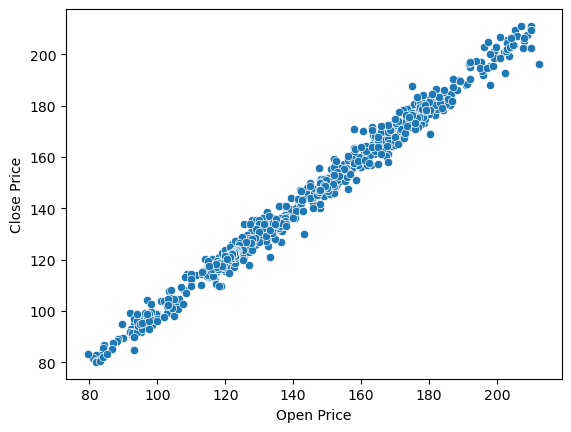

In [19]:

sns.scatterplot(x=lt['Open Price'],y=lt['Close Price'])

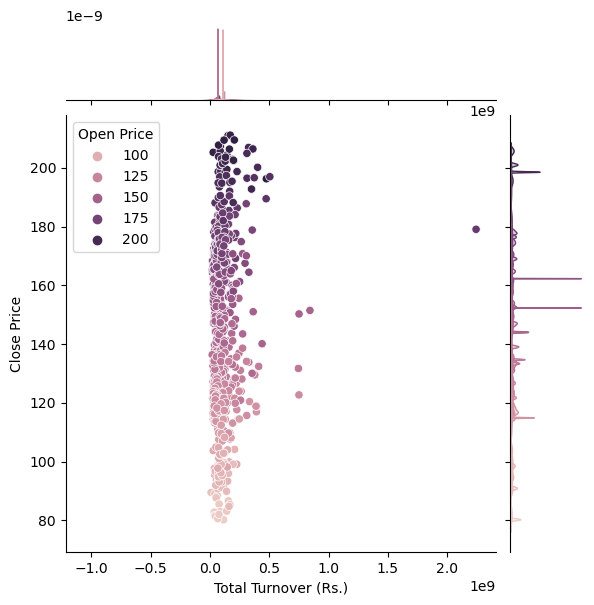

In [20]:
sns.jointplot(x=lt['Total Turnover (Rs.)'],y=lt['Close Price'],hue=lt['Open Price'])

<Axes: xlabel='Close Price', ylabel='Count'>

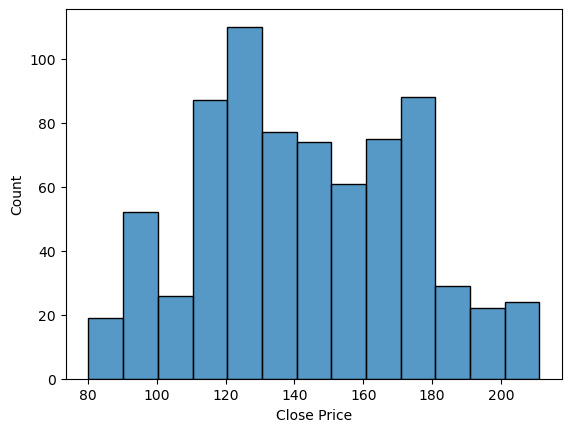

In [21]:
sns.histplot(x=lt['Close Price'])

<Axes: xlabel='Spread Close-Open', ylabel='Spread High-Low'>

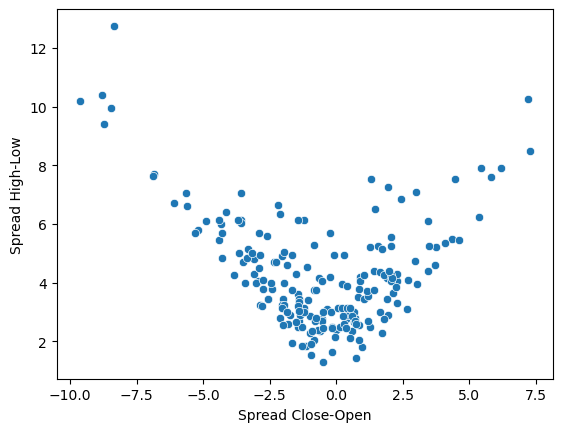

In [22]:
sns.scatterplot(y=lt['Spread High-Low'].head(200),x=lt['Spread Close-Open'])

In [23]:
lt['Date']=pd.to_datetime(lt['Date'])

In [24]:
lt.dtypes

Date                            datetime64[ns]
Open Price                             float64
High Price                             float64
Low Price                              float64
Close Price                            float64
WAP                                    float64
No.of Shares                             int64
No. of Trades                            int64
Total Turnover (Rs.)                   float64
Deliverable Quantity                   float64
Percentage Qty to Traded Qty           float64
Spread High-Low                        float64
Spread Close-Open                      float64
dtype: object

In [25]:
lt.head(2)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,Percentage Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2020-02-04,111.5,114.55,111.45,114.15,113.444247,507614,3232,57585888.0,153199.0,30.18,3.1,2.65
1,2020-02-03,109.8,113.45,108.25,111.05,110.885149,582592,5341,64600801.0,178957.0,30.72,5.2,1.25


In [26]:
lt['month']=lt['Date'].dt.month

In [31]:
lt['day']=lt['Date'].dt.day

In [32]:
lt['year']=lt['Date'].dt.year

In [33]:
lt.head(3)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,Percentage Qty to Traded Qty,Spread High-Low,Spread Close-Open,month,day,year
0,2020-02-04,111.5,114.55,111.45,114.15,113.444247,507614,3232,57585888.0,153199.0,30.18,3.1,2.65,2,4,2020
1,2020-02-03,109.8,113.45,108.25,111.05,110.885149,582592,5341,64600801.0,178957.0,30.72,5.2,1.25,2,3,2020
2,2020-02-01,118.6,118.60,108.20,109.80,114.901732,1444455,8277,165970382.0,832497.0,57.63,10.4,-8.80,2,1,2020


In [34]:
lt.drop('Date',inplace=True,axis=1)

In [36]:
lt.isnull().sum()

Open Price                      0
High Price                      0
Low Price                       0
Close Price                     0
WAP                             0
No.of Shares                    0
No. of Trades                   0
Total Turnover (Rs.)            0
Deliverable Quantity            0
Percentage Qty to Traded Qty    0
Spread High-Low                 0
Spread Close-Open               0
month                           0
day                             0
year                            0
dtype: int64

In [37]:
lt.dtypes

Open Price                      float64
High Price                      float64
Low Price                       float64
Close Price                     float64
WAP                             float64
No.of Shares                      int64
No. of Trades                     int64
Total Turnover (Rs.)            float64
Deliverable Quantity            float64
Percentage Qty to Traded Qty    float64
Spread High-Low                 float64
Spread Close-Open               float64
month                             int64
day                               int64
year                              int64
dtype: object

In [38]:
x=lt.drop('Close Price',axis=1)

In [39]:
y=lt['Close Price']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(595, 14)
(149, 14)
(595,)
(149,)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(f'''score {lr.score(X_train,y_train)}''')
Rsc=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("r2_score:",Rsc)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)

score 1.0
r2_score: 1.0
Mean Squared Error: 2.5850071821449017e-25
Mean Absolute Error: 1.6623838770870532e-13


In [46]:
actual_value=y_test
predicted=y_pred
print("Actual Values:",actual_value[:5])
print("predicted Values:",predicted[:5])

Actual Values: 372    178.35
74      86.65
64      95.40
79      81.65
605    173.20
Name: Close Price, dtype: float64
predicted Values: [178.35  86.65  95.4   81.65 173.2 ]


Text(0.5, 1.0, 'Actual Value Vs Predicated Value')

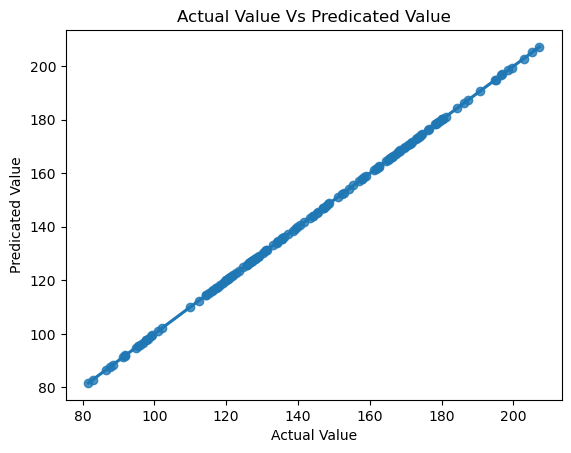

In [47]:
sns.regplot(x=actual_value,y=predicted)
plt.xlabel("Actual Value")
plt.ylabel("Predicated Value")
plt.title("Actual Value Vs Predicated Value")